Dependencies/Imports

In [1]:
%pip install pandas openpyxl ucimlrepo matplotlib scikit-learn

In [25]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# from google.colab import files
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)
# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

C:\Users\Alex\miniconda3\envs\cs178\lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [26]:
data = pd.concat([X, y], axis=1)
def drop_columns(df) -> None:
  new_data = df.copy()
  new_data = new_data.drop(columns=['race', 'weight', 'payer_code','medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult'])
  return new_data
df = drop_columns(data)
print("success")

success


In [27]:
X = df.drop(columns=['readmitted'])
X = X.replace(to_replace={'Male': 0, 'Female': 1, 'Unknown/Invalid': 1, '[0-10)': 0, '[10-20)': 1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5,'[60-70)':6,'[70-80)':7,'[80-90)':8, '[90-100)':9, 'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3, 'Yes': 1, 'Ch': 1, '>300':2, 'Norm': 0, '>200': 1, '>7': 1, '>8':2})
y = df['readmitted']
seed1 = 1234
np.random.seed(seed1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed1, shuffle=True)
# Further split training data 75/25 into training and validation data
seed2 = 1234
np.random.seed(seed2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, y_train, test_size=0.25, random_state=seed2, shuffle=True)
print("success")

C:\Users\Alex\AppData\Local\Temp\ipykernel_36912\3222633924.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(to_replace={'Male': 0, 'Female': 1, 'Unknown/Invalid': 1, '[0-10)': 0, '[10-20)': 1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5,'[60-70)':6,'[70-80)':7,'[80-90)':8, '[90-100)':9, 'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3, 'Yes': 1, 'Ch': 1, '>300':2, 'Norm': 0, '>200': 1, '>7': 1, '>8':2})


success


done fitting
done fitting
done fitting
done fitting
done fitting
done fitting
done fitting
done fitting
done fitting
done fitting


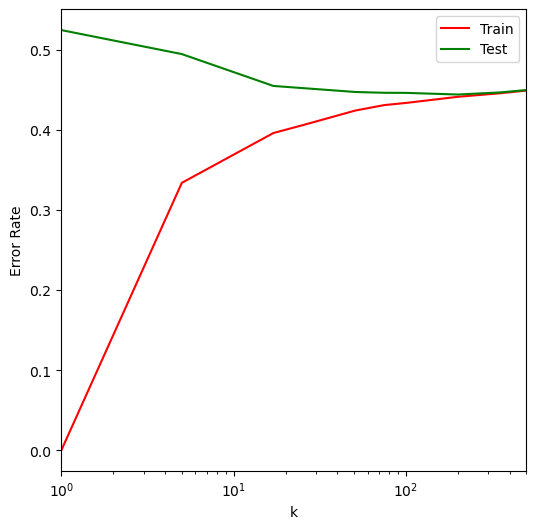

Minimum testing error: 0.4441878746192395


In [4]:
#Train Knn
figure, axes = plt.subplots(1, figsize=(6, 6))
k_vals = [1, 5, 17, 25, 51, 75, 100, 200, 351, 501]
err_tr = np.zeros(len(k_vals))
err_te = np.zeros(len(k_vals))

for i, k in enumerate(k_vals):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    print("done fitting")
    yhat_tr = knn.predict(X2_train)
    yhat_te = knn.predict(X_test)
    err_tr[i] = 1. - accuracy_score(y2_train, yhat_tr)
    err_te[i] = 1. - accuracy_score(y_test, yhat_te)
    
axes.semilogx(k_vals, err_tr, c='red', label='Train')
axes.semilogx(k_vals, err_te, c='green', label='Test')
axes.set_xlabel('k')
axes.set_ylabel('Error Rate')
axes.set_xlim([1, 500]) 
axes.legend()

plt.show()

# Print the minimum error rates for training and testing

print(f'Minimum testing error: {min(err_te)}')


In [9]:
param_grid = {
    'n_neighbors' : [1, 5, 11, 25, 51, 100, 200, 351],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
    'p' : [1,2]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv =5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X2_train, y2_train)

best_p = grid_search.best_params_
print(f"Best paramters found: {best_p}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(f"Test set accuracy: {accuracy:.4f}")


C:\Users\Alex\miniconda3\envs\cs178\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.47064314 0.47064314 0.47067594 0.47067594
 0.50976925 0.51789254 0.50099078 0.5145023  0.53877397 0.54252445
 0.53492527 0.53988769 0.55325182 0.55418533 0.55046763 0.55197434
 0.55755909 0.55795215 0.5535957  0.55461111 0.55677297 0.55693673
 0.55344828 0.55446372 0.55669105 0.55741166 0.55231823 0.55362843
 0.55356292 0.55397238 0.55005814 0.55077874 0.47010268 0.47010268
 0.47129829 0.47129829 0.50904864 0.51733569 0.50136745 0.51523929
 0.53834821 0.54160733 0.53512179 0.53931

Best paramters found: {'algorithm': 'ball_tree', 'n_neighbors': 51, 'p': 1, 'weights': 'distance'}


ValueError: Found input variables with inconsistent numbers of samples: [20353, 20354]

In [5]:
knn = KNeighborsClassifier()

knn.fit(X2_train, y2_train)

train_pred = knn.predict(X2_train)
train_acc = accuracy_score(train_pred, y2_train)

test_pred = knn.predict(X_test)
test_acc = accuracy_score(test_pred, y_test)

print(f"Training Error: {1 - train_acc}")
print(f"Testing Error: {1 - test_acc}")


Training Error: 0.33390654940303643
Testing Error: 0.49469391765746296


In [23]:
knn = KNeighborsClassifier(n_neighbors = 37, weights = 'distance', algorithm = 'ball_tree', p = 1)

knn.fit(X2_train, y2_train)

train_pred = knn.predict(X2_train)
train_acc = accuracy_score(train_pred, y2_train)

test_pred = knn.predict(X_test)
test_acc = accuracy_score(test_pred, y_test)

print(f"Training Error: {1 - train_acc}")
print(f"Testing Error: {1 - test_acc}")

Training Error: 0.00011464321394061283
Testing Error: 0.4419278765844551


In [12]:
#Decision Tree
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 2, 10, 20, 30, 40, 50, 75, 100, 200],
    'min_samples_split': [2, 10, 20, 50, 500, 750, ],
    'min_samples_leaf' : [1, 5, 10, 30]
}

dt = DecisionTreeClassifier(random_state = seed2)
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5, scoring ='accuracy')
grid_search.fit(X2_train, y2_train)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(f"Test set accuracy: {accuracy:.4f}")


Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 50, 'splitter': 'random'}
Test set accuracy: 0.5683


Training Error: 0.41733405394782097
Testing Error: 0.41706789820182766


[Text(0.5816200657894737, 0.9545454545454546, 'x[11] <= 0.5\nentropy = 1.365\nsamples = 61059\nvalue = [6832, 21379, 32848]'),
 Text(0.27117598684210525, 0.8636363636363636, 'x[12] <= 5.5\nentropy = 1.255\nsamples = 40455\nvalue = [3427, 12189, 24839]'),
 Text(0.08223684210526316, 0.7727272727272727, 'x[1] <= 5.5\nentropy = 1.105\nsamples = 9666\nvalue = [614.0, 2286.0, 6766.0]'),
 Text(0.049342105263157895, 0.6818181818181818, 'x[5] <= 5.5\nentropy = 1.001\nsamples = 4583\nvalue = [225, 947, 3411]'),
 Text(0.04276315789473684, 0.5909090909090909, 'x[3] <= 4.5\nentropy = 0.972\nsamples = 4037\nvalue = [182, 808, 3047]'),
 Text(0.03618421052631579, 0.5, 'x[9] <= 0.5\nentropy = 0.956\nsamples = 3543\nvalue = [164, 671, 2708]'),
 Text(0.029605263157894735, 0.4090909090909091, 'x[37] <= 0.5\nentropy = 0.935\nsamples = 3278\nvalue = [145, 600, 2533]'),
 Text(0.013157894736842105, 0.3181818181818182, 'x[10] <= 0.5\nentropy = 0.822\nsamples = 772\nvalue = [30.0, 111.0, 631.0]'),
 Text(0.00657

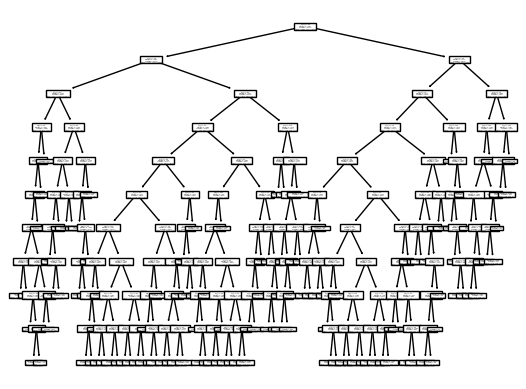

In [28]:
#comparing default and best parameters

dt_default = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 10, min_samples_split = 750, min_samples_leaf = 5, random_state = seed2)
dt_default.fit(X2_train, y2_train)

pred = dt_default.predict(X2_train)
acc1 = accuracy_score(pred, y2_train)

testpred = dt_default.predict(X_test)
acc2 = accuracy_score(testpred, y_test)

print(f"Training Error: {1 -acc1}")
print(f"Testing Error: {1 -acc2}")
plot_tree(dt_default)

In [31]:
dt_default = DecisionTreeClassifier(random_state = seed2)
dt_default.fit(X2_train, y2_train)

pred = dt_default.predict(X2_train)
acc1 = accuracy_score(pred, y2_train)

testpred = dt_default.predict(X_test)
acc2 = accuracy_score(testpred, y_test)

print(f"Training Error: {1 -acc1}")
print(f"Testing Error: {1 -acc2}")

#plot_tree(dt_default)

Training Error: 0.00011464321394061283
Testing Error: 0.5290360617077725
